In [9]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt

%matplotlib notebook

In [10]:
x = np.linspace(0,1.0,9); print x

[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.   ]


In [11]:
dx = x[1]-x[0]; print dx

0.125


In [12]:
D = 1.0

In [13]:
dt = dx**2/2/D / 10; print dt
nt = 10 # Number of time steps
t = dt*nt; print t

0.00078125
0.0078125


In [14]:
C = (dt * D) / (dx**2); print C # For constants in "propagate" function 

0.05


In [15]:
# Starting f(t,x) as 2-D array of random numbers; pseudo: f[time][x]; n = 0 row stores initial field

f = np.array([[rn.random() for i in range(len(x))] for j in range(int(t/dt)+1)]); print f; # Adding a time row to include intial field

[[ 0.68319051  0.9617999   0.61999225  0.50872997  0.39252639  0.74808918
   0.05353877  0.05744637  0.07679884]
 [ 0.91676592  0.6537705   0.869426    0.61752848  0.90916221  0.5641041
   0.32009489  0.20884444  0.44757877]
 [ 0.2246232   0.28229597  0.99971593  0.19890365  0.5868061   0.47135071
   0.9853447   0.6302065   0.41261749]
 [ 0.802896    0.58653591  0.54380788  0.86751893  0.18542678  0.80623352
   0.60939032  0.43236289  0.74937547]
 [ 0.81729564  0.31420138  0.60123364  0.91670653  0.66095873  0.24617497
   0.69805828  0.53967687  0.69267898]
 [ 0.18587338  0.96444615  0.21011404  0.60922607  0.22443737  0.36507631
   0.04094671  0.74038672  0.18688764]
 [ 0.92979729  0.30084563  0.1873141   0.44033616  0.09659451  0.35874137
   0.94869373  0.75488497  0.53228262]
 [ 0.68603467  0.34966876  0.67242194  0.94896256  0.27648977  0.58105364
   0.71737671  0.70830393  0.37545801]
 [ 0.06799027  0.87179401  0.97392334  0.33828642  0.63936647  0.66984161
   0.51390816  0.134379

In [16]:
# Function that iterates diffusion values through number of time steps
def propagate(f, nt):
    # nt = len(f) - 1 # not including initial field in number of time steps
    # print nt
    for n in range(0, nt) :
        for k in range(0, len(x)):
            f_pre = f[n][k] 
            if k == 0:
                f[n+1][k] = C * ( f[n][len(x)-1] - 2*f_pre + f[n][k+1] ) + f_pre
                # print 'hi'

            elif k == (len(x) - 1):
                f[n+1][k] = C * ( f[n][k-1] - 2*f_pre + f[n][0] ) + f_pre
                # print'hello'
            else:
                f[n+1][k] = C * ( f[n][k-1] - 2*f_pre + f[n][k+1] ) + f_pre
                # print 'hey'
                
    return f

In [17]:
propagate(f,nt)

array([[ 0.68319051,  0.9617999 ,  0.61999225,  0.50872997,  0.39252639,
         0.74808918,  0.05353877,  0.05744637,  0.07679884],
       [ 0.66680139,  0.93077905,  0.63151951,  0.5084829 ,  0.4161147 ,
         0.69558352,  0.08846167,  0.05821861,  0.1061508 ],
       [ 0.65196775,  0.90261719,  0.64033066,  0.51001632,  0.43470655,
         0.65125398,  0.11730561,  0.06212737,  0.13178672],
       [ 0.63849117,  0.87697039,  0.64692927,  0.51276655,  0.44929941,
         0.61372919,  0.14124411,  0.06836925,  0.1543128 ],
       [ 0.62620621,  0.85354437,  0.65172319,  0.51630133,  0.46069426,
         0.58188345,  0.16122463,  0.07631017,  0.17422454],
       [ 0.61497403,  0.83208641,  0.65504316,  0.52029207,  0.46953407,
         0.55479105,  0.17801184,  0.08545161,  0.19192791],
       [ 0.60467735,  0.81237862,  0.65715776,  0.52449172,  0.47633482,
         0.53168924,  0.19222279,  0.09540344,  0.2077564 ],
       [ 0.59521636,  0.79423252,  0.65828551,  0.52871718,  0

<IPython.core.display.Javascript object>


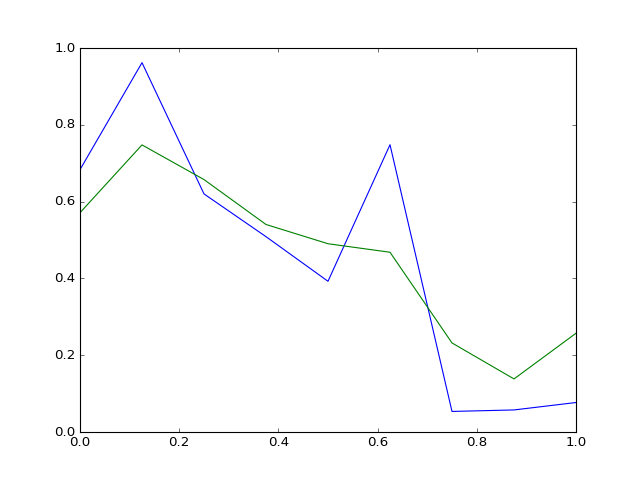

In [18]:
plt.plot(x,f[0])
plt.plot(x,f[-1])